### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

### EDA and Data Preprocessing

In [2]:
# Function to clean tweet text
def clean_text(text):
    text = str(text) if text is not None else '' # Convert to string, handle None
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation and numbers
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    return text

# Function to generate a word cloud
def generate_wordcloud(data):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(data))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Function to plot sentiment distribution
def plot_sentiment_distribution(df, title):
    sentiment_count = df['sentiment'].value_counts()
    plt.figure(figsize=(6, 4))
    sentiment_count.plot(kind='bar')
    plt.title(title)
    plt.xlabel('Sentiment')
    plt.ylabel('Counts')
    plt.show()

### Load datasets

In [3]:
# Train
train_df = pd.read_csv('tweettrain.csv')
train_df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


In [4]:
# Test
test_df = pd.read_csv('tweettest.csv')
test_df

,textID,text,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative
3,01082688c6,happy bday!,positive
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive
...,...,...,...
3529,e5f0e6ef4b,"its at 3 am, im very tired but i can`t sleep ...",negative
3530,416863ce47,All alone in this old house again. Thanks for...,positive
3531,6332da480c,I know what you mean. My little dog is sinkin...,negative
3532,df1baec676,_sutra what is your next youtube video gonna b...,positive


In [5]:
# Clean text data
train_df['text'] = train_df['text'].apply(clean_text)
test_df['text'] = test_df['text'].apply(clean_text)


Word Cloud for Positive Sentiment:


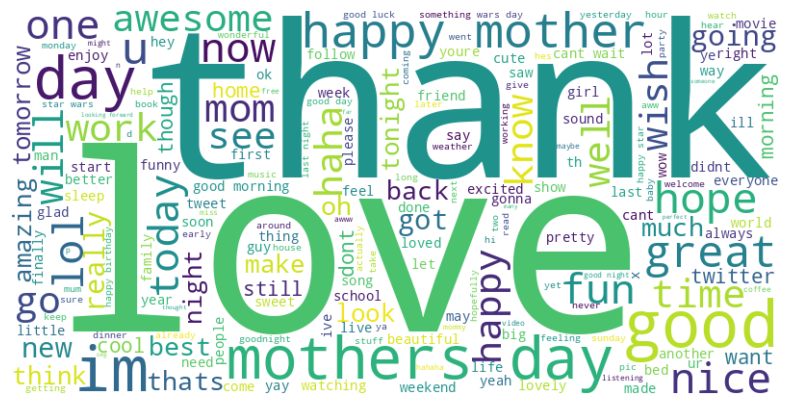

In [6]:
# Filter text based on sentiment
positive_text = train_df[train_df['sentiment'] == 'positive']['text']
negative_text = train_df[train_df['sentiment'] == 'negative']['text']
neutral_text = train_df[train_df['sentiment'] == 'neutral']['text']

# Generate word clouds for each sentiment
print("\nWord Cloud for Positive Sentiment:")
generate_wordcloud(positive_text)


Word Cloud for Negative Sentiment:


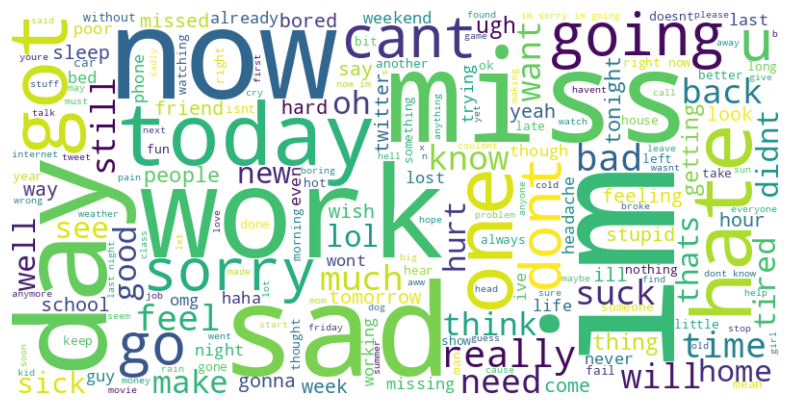

In [7]:
print("\nWord Cloud for Negative Sentiment:")
generate_wordcloud(negative_text)


Word Cloud for Neutral Sentiment:


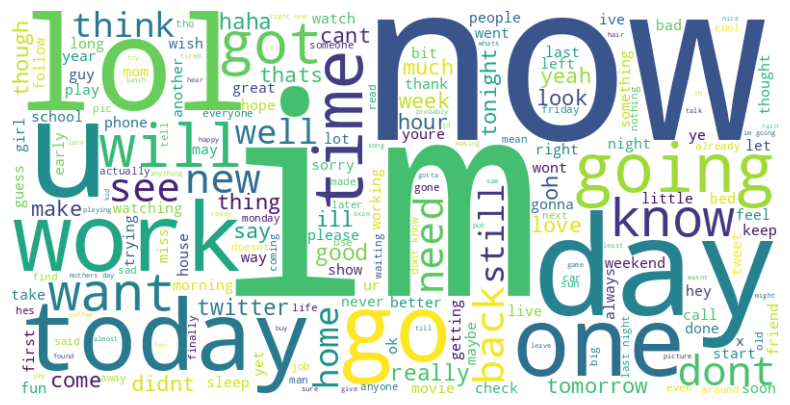

In [8]:
print("\nWord Cloud for Neutral Sentiment:")
generate_wordcloud(neutral_text)


Sentiment Distribution in Training Data:


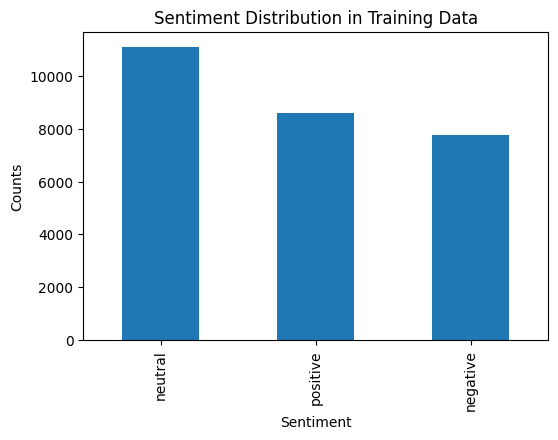

In [9]:
# Sentiment Distribution in Training Data
print("\nSentiment Distribution in Training Data:")
plot_sentiment_distribution(train_df, 'Sentiment Distribution in Training Data')


Sentiment Distribution in Test Data:


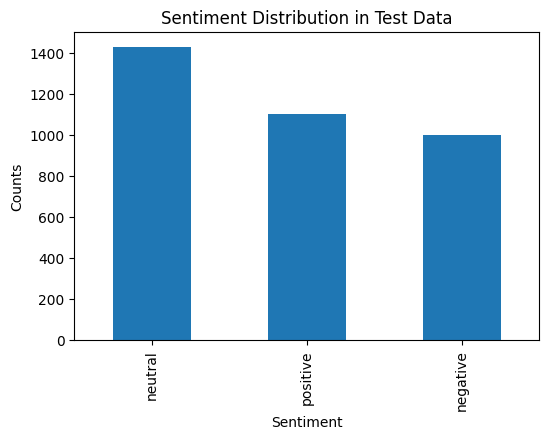

In [10]:
# Sentiment Distribution in Test Data
print("\nSentiment Distribution in Test Data:")
plot_sentiment_distribution(test_df, 'Sentiment Distribution in Test Data')

In [11]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_vectorizer.fit(train_df['text'])
train_vectors = tfidf_vectorizer.transform(train_df['text'])
test_vectors = tfidf_vectorizer.transform(test_df['text'])

In [12]:
# Encode labels
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_df['sentiment'])
test_labels = label_encoder.transform(test_df['sentiment'])

### Build the SVC model

In [13]:
# Support Vector Classifier
svc_classifier = SVC(kernel='linear')
svc_classifier.fit(train_vectors, train_labels)

SVC(kernel='linear')

In [14]:
# Predict on test data
test_predictions = svc_classifier.predict(test_vectors)

### Evaluate the Model

In [15]:
# Calculate accuracy
accuracy = accuracy_score(test_labels, test_predictions)
print(f'\nAccuracy: {accuracy}')


Accuracy: 0.7105263157894737


In [16]:
# Generate classification report
report = classification_report(test_labels, test_predictions, target_names=label_encoder.classes_)
print(report)

              precision    recall  f1-score   support

    negative       0.73      0.64      0.68      1001
     neutral       0.64      0.77      0.70      1430
    positive       0.83      0.70      0.76      1103

    accuracy                           0.71      3534
   macro avg       0.73      0.70      0.71      3534
weighted avg       0.72      0.71      0.71      3534

